In [1]:
# -*- coding: utf-8 -*-
"""
Stock Price Prediction with Deep Learning - Practical Implementation
Using real-world stock data with RNNs, LSTMs, and GRUs
"""

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set style for plots
plt.style.use('default')
sns.set_palette("deep")

# 1. Downloading and Exploring Real Stock Data
Let's download real stock data using Yahoo Finance API.

In [2]:
# TODO 1: Try different stock symbols (e.g., 'GOOG', 'MSFT', 'TSLA')
stock_symbol = 'TSLA'  # Apple Inc.

# Download historical stock data
data = yf.download(stock_symbol, start='2015-01-01', end='2025-09-01')
print(f"Downloaded {len(data)} days of data for {stock_symbol}")

[*********************100%***********************]  1 of 1 completed

Downloaded 2681 days of data for TSLA


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [4]:
# Display basic information about the dataset
print("\nDataset info:")
print(data.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2681 entries, 2015-01-02 to 2025-08-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2681 non-null   float64
 1   (High, TSLA)    2681 non-null   float64
 2   (Low, TSLA)     2681 non-null   float64
 3   (Open, TSLA)    2681 non-null   float64
 4   (Volume, TSLA)  2681 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


In [5]:
# Basic statistics
print("\nBasic statistics:")
print(data.describe())


Basic statistics:
Price         Close         High          Low         Open        Volume
Ticker         TSLA         TSLA         TSLA         TSLA          TSLA
count   2681.000000  2681.000000  2681.000000  2681.000000  2.681000e+03
mean     128.164162   131.053378   125.149235   128.197188  1.117993e+08
std      121.531811   124.388240   118.621587   121.645576  7.237185e+07
min        9.578000    10.331333     9.403333     9.488000  1.062000e+07
25%       17.594000    17.850668    17.316668    17.597334  6.764700e+07
50%       53.367332    54.933334    52.333332    53.666668  9.320400e+07
75%      235.600006   239.573334   230.350006   234.896667  1.292018e+08
max      479.859985   488.540009   457.510010   475.899994  9.140820e+08


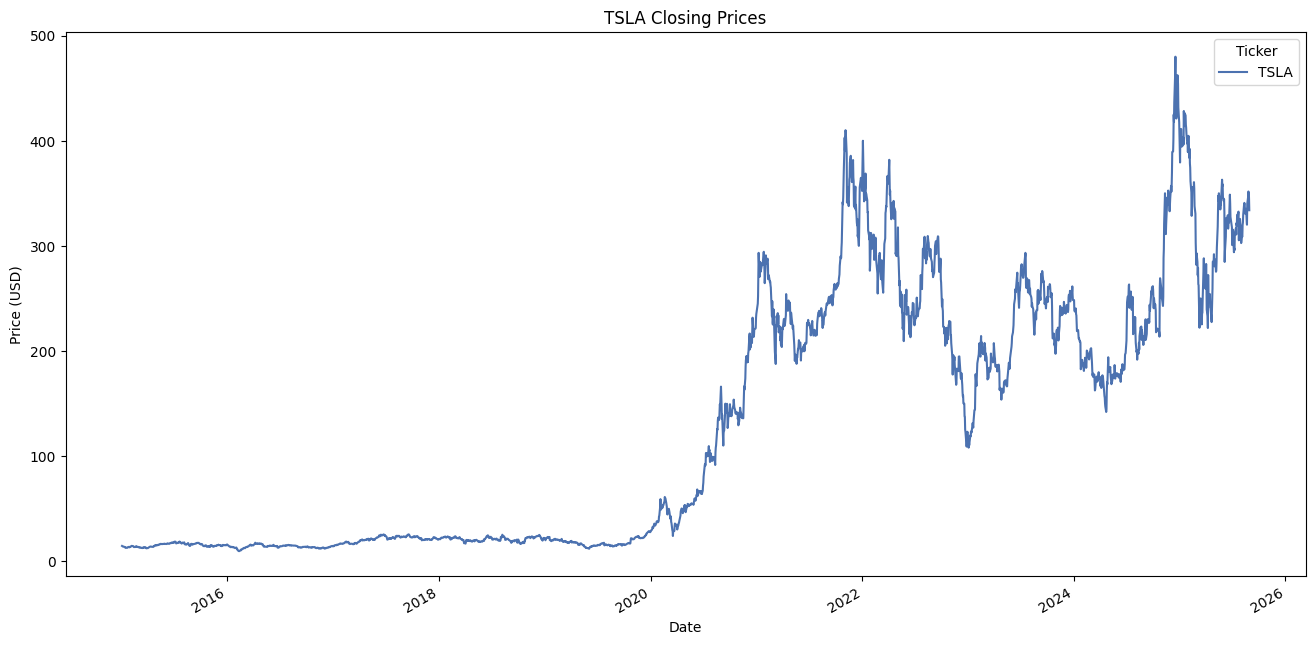


Missing values in each column:
Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6475e-04 - val_loss: 0.0014
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4085e-04 - val_loss: 0.0012
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.3674e-04 - val_loss: 0.0012
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6581e-04 - val_loss: 0.0011
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.1746e-04 - val_loss: 9.3034e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8420e-04 - val_loss: 8.2735e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6114e-04 - val_loss: 7.5769e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4440e-04 - val_loss: 7.0645e-04
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3151e-04 - val_loss: 6.6520e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.2116e-04 - val_loss: 6.3062e-04
E

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.2758e-04 - val_loss: 0.0022
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.6842e-04 - val_loss: 0.0021
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.1433e-04 - val_loss: 0.0019
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7955e-04 - val_loss: 0.0016
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2979e-04 - val_loss: 0.0014
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9357e-04 - val_loss: 0.0012
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.6693e-04 - val_loss: 0.0011
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.4403e-04 - val_loss: 0.0011
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2396e-04 - val_loss: 9.9142e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0615e-04 - val_loss: 9.2919e-04
Epoch 12/20
59/

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0087 - val_loss: 7.0594e-04
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 3.0121e-04 - val_loss: 6.1307e-04
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.7421e-04 - val_loss: 5.7211e-04
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.6369e-04 - val_loss: 5.1549e-04
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.5087e-04 - val_loss: 4.6849e-04
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4069e-04 - val_loss: 4.4417e-04
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.3641e-04 - val_loss: 4.3633e-04
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.3413e-04 - val_loss: 4.3906e-04
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.3156e-04 - val_loss: 4.4544e-04
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2809e-04 - val_loss: 4.5064e-04
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2399e-04 - 

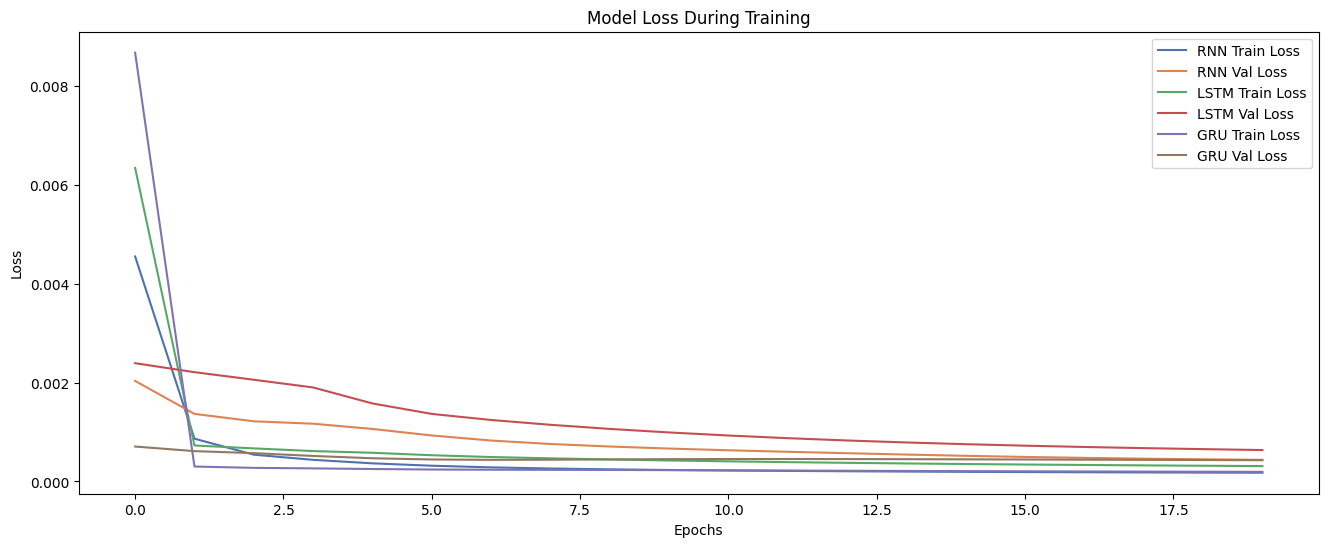

In [6]:
#data.hist(bins = 25, figsize = (16,10))
#plt.show()
data['Close'].plot(title=f'{stock_symbol} Closing Prices', figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())
# Drop rows with missing values (if any)
data.dropna(inplace=True)
# Focus on 'Close' price for prediction
close_prices = data[['Close']]
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)
# Prepare the dataset for time series prediction
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)
time_step = 60
X, y = create_dataset(scaled_data, time_step)
# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# Build RNN model
def build_rnn_model(input_shape):
    model = keras.Sequential()
    model.add(layers.SimpleRNN(50, return_sequences=True, input_shape=input_shape))
    model.add(layers.SimpleRNN(50))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
rnn_model = build_rnn_model((time_step, 1))
rnn_model.summary()
# Train RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
# Build LSTM model
def build_lstm_model(input_shape):
    model = keras.Sequential()
    model.add(layers.LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(50))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
lstm_model = build_lstm_model((time_step, 1))
lstm_model.summary()
# Train LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
# Build GRU model
def build_gru_model(input_shape):
    model = keras.Sequential()
    model.add(layers.GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(layers.GRU(50))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
gru_model = build_gru_model((time_step, 1))
gru_model.summary()
# Train GRU model
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
# Make predictions
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)
# Inverse transform predictions and actual values
rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
# Evaluate models
def evaluate_model(true, predicted, model_name):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")
evaluate_model(y_test_original, rnn_predictions, "RNN")
evaluate_model(y_test_original, lstm_predictions, "LSTM")
evaluate_model(y_test_original, gru_predictions, "GRU")
# Plot training & validation loss for each model
plt.figure(figsize=(16, 6))
plt.plot(rnn_history.history['loss'], label='RNN Train Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Val Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



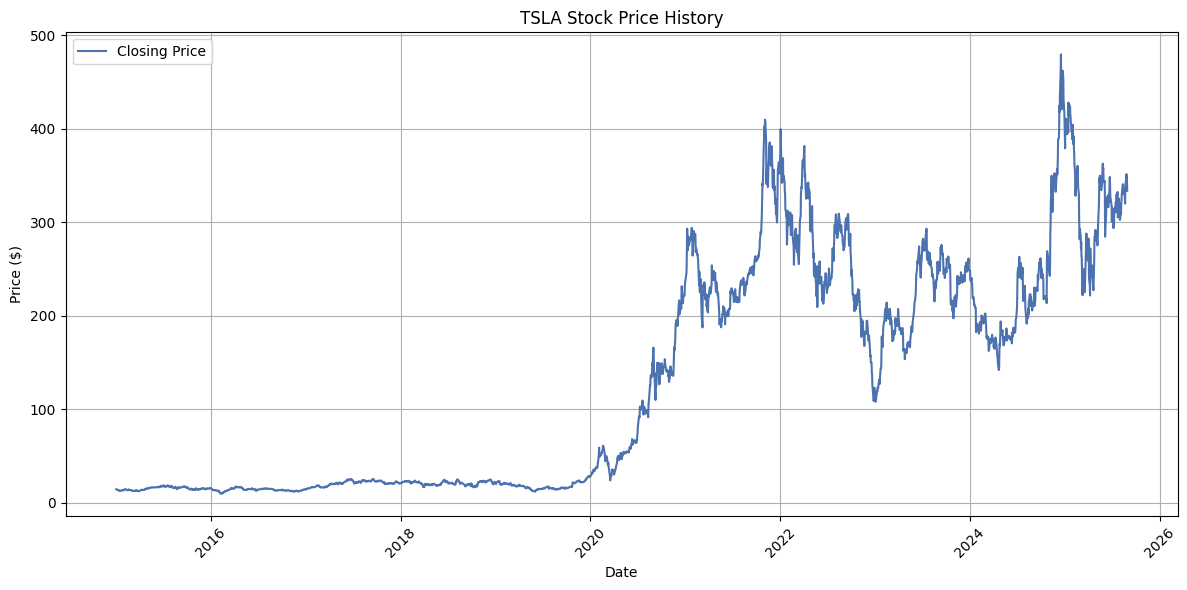

In [7]:
# Visualize the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title(f'{stock_symbol} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


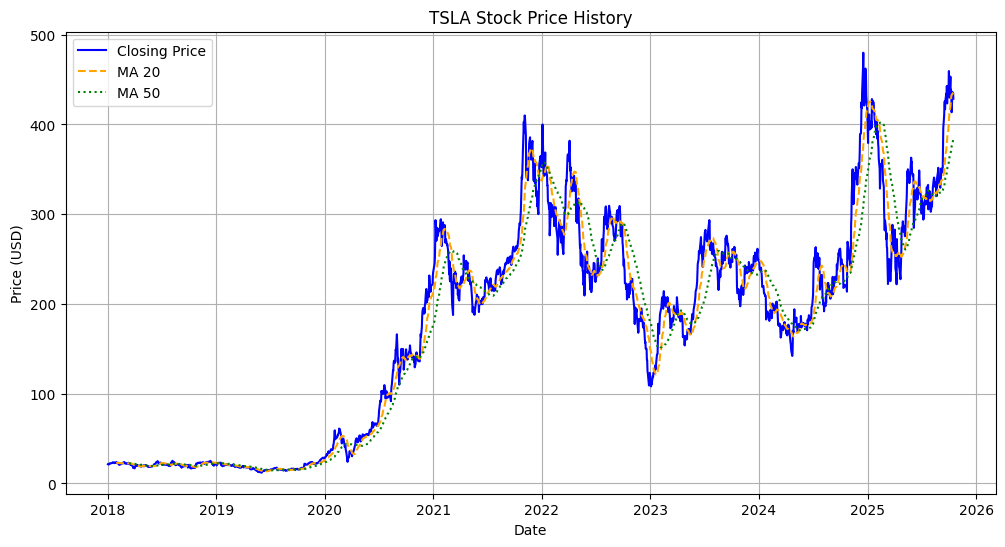

In [8]:
# Install yfinance if not already


import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# --- Tesla stock settings ---
stock_symbol = "TSLA"
start_date = "2018-01-01"
end_date = datetime.date.today().isoformat()

# Download TSLA data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Plot chart
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['Close'].rolling(20).mean(), label='MA 20', linestyle='--', color='orange')
plt.plot(data.index, data['Close'].rolling(50).mean(), label='MA 50', linestyle=':', color='green')

plt.title("TSLA Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import yfinance as yf
import datetime

stock_symbol = "TSLA"
start_date = "2018-01-01"
end_date = datetime.date.today().isoformat()

data = yf.download(stock_symbol, start=start_date, end=end_date)
print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2018-01-02  21.368668  21.474001  20.733334  20.799999   65283000
2018-01-03  21.150000  21.683332  21.036667  21.400000   67822500
2018-01-04  20.974667  21.236668  20.378668  20.858000  149194500
2018-01-05  21.105333  21.149332  20.799999  21.108000   68868000
2018-01-08  22.427334  22.468000  21.033333  21.066668  147891000
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-10-10  413.489990  443.130005  411.450012  436.540009  112107900
2025-10-13  435.899994  436.890015  419.700012  423.529999   79552800
2025-10-14  429.239990  434.200012  417.859985  426.790009   72669400
2025-10-15  435.149994  440.510010  426.329987  434.

In [10]:
# Use closing price for prediction
price_data = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price_data)

print(f"Original price range: ${price_data.min():.2f} - ${price_data.max():.2f}")
print(f"Scaled price range: {scaled_data.min():.4f} - {scaled_data.max():.4f}")

# TODO 3: Experiment with different sequence lengths
sequence_length = 60  # Use 60 days of historical data to predict the next day

# Create sequences of data for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length)

# Reshape data for RNN input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Original price range: $11.93 - $479.86
Scaled price range: 0.0000 - 1.0000
X shape: (1899, 60, 1)
y shape: (1899,)
Training samples: 1519
Testing samples: 380


# 3. Building and Training Different Models
Let's create and compare three different models: Simple RNN, LSTM, and GRU.

In [11]:
# TODO 4: Try different model architectures and hyperparameters

# Model 1: Simple RNN
def build_rnn_model(seq_length, units=50):
    model = keras.Sequential([
        layers.SimpleRNN(units, return_sequences=True, input_shape=(seq_length, 1)),
        layers.SimpleRNN(units),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Model 2: LSTM
def build_lstm_model(seq_length, units=50):
    model = keras.Sequential([
        layers.LSTM(units, return_sequences=True, input_shape=(seq_length, 1)),
        layers.LSTM(units),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Model 3: GRU
def build_gru_model(seq_length, units=50):
    model = keras.Sequential([
        layers.GRU(units, return_sequences=True, input_shape=(seq_length, 1)),
        layers.GRU(units),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Build all three models
rnn_model = build_rnn_model(sequence_length)
lstm_model = build_lstm_model(sequence_length)
gru_model = build_gru_model(sequence_length)

# Display model architectures
print("RNN Model Summary:")
rnn_model.summary()

print("\nLSTM Model Summary:")
lstm_model.summary()

print("\nGRU Model Summary:")
gru_model.summary()

RNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,951 (34.96 KB)

 Trainable params: 8,951 (34.96 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)


GRU Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,551 (95.90 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train all three models
# TODO 5: Experiment with different numbers of epochs and batch sizes
epochs = 50
batch_size = 32

print("Training RNN model...")
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

print("Training LSTM model...")
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

print("Training GRU model...")
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

Training RNN model...
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0666 - val_loss: 0.0040
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - val_loss: 9.9794e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - val_loss: 9.1596e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.1514e-04 - val_loss: 9.1392e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2789e-04 - val_loss: 0.0011
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.5903e-04 - val_loss: 0.0011
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9384e-04 - val_loss: 9.9889e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.5687e-04 - val_loss: 0.0010
Epoch

# 4. Evaluating Model Performance

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Model Performance Comparison:
  Model     MSE    MAE   RMSE
0   RNN  180.09   9.79  13.42
1  LSTM  269.62  12.11  16.42
2   GRU  184.34   9.85  13.58


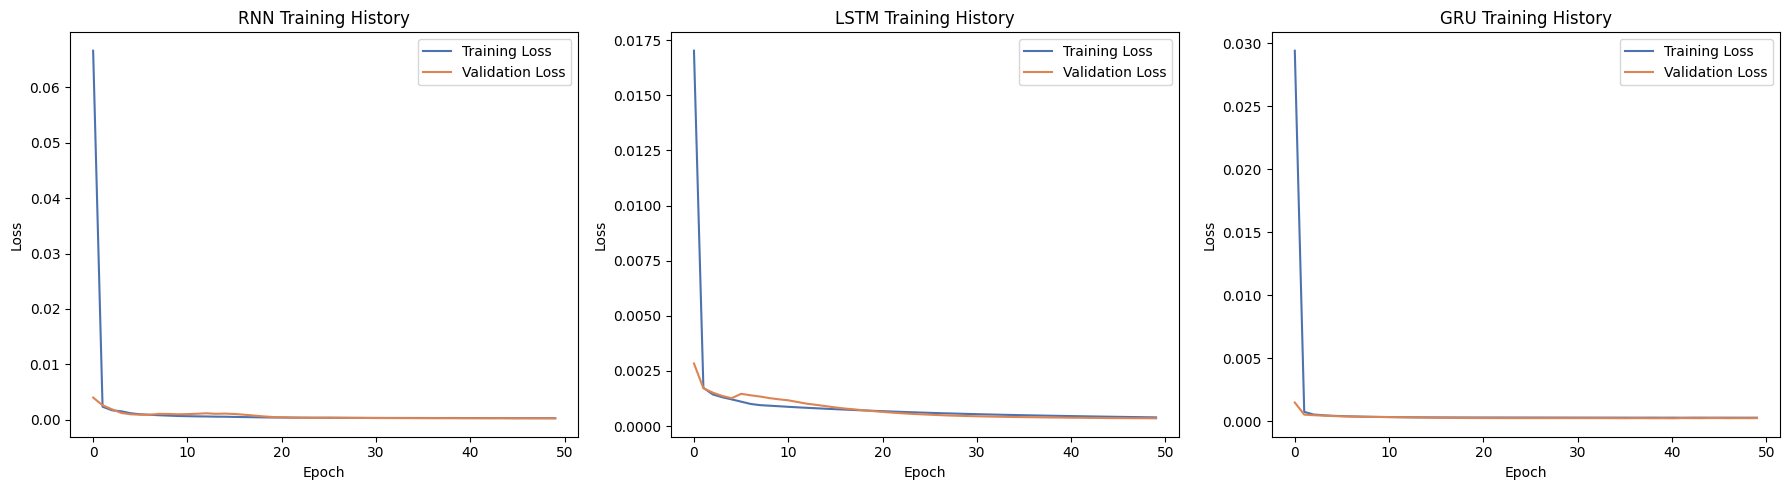

In [13]:
# Make predictions with all models
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Inverse transform predictions to original scale
rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
gru_predictions = scaler.inverse_transform(gru_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

rnn_mse, rnn_mae, rnn_rmse = calculate_metrics(y_test_original, rnn_predictions)
lstm_mse, lstm_mae, lstm_rmse = calculate_metrics(y_test_original, lstm_predictions)
gru_mse, gru_mae, gru_rmse = calculate_metrics(y_test_original, gru_predictions)

# Create a comparison table
metrics_df = pd.DataFrame({
    'Model': ['RNN', 'LSTM', 'GRU'],
    'MSE': [rnn_mse, lstm_mse, gru_mse],
    'MAE': [rnn_mae, lstm_mae, gru_mae],
    'RMSE': [rnn_rmse, lstm_rmse, gru_rmse]
})

print("Model Performance Comparison:")
print(metrics_df.round(2))

# Visualize the training history
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RNN training history
axes[0].plot(rnn_history.history['loss'], label='Training Loss')
axes[0].plot(rnn_history.history['val_loss'], label='Validation Loss')
axes[0].set_title('RNN Training History')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# LSTM training history
axes[1].plot(lstm_history.history['loss'], label='Training Loss')
axes[1].plot(lstm_history.history['val_loss'], label='Validation Loss')
axes[1].set_title('LSTM Training History')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# GRU training history
axes[2].plot(gru_history.history['loss'], label='Training Loss')
axes[2].plot(gru_history.history['val_loss'], label='Validation Loss')
axes[2].set_title('GRU Training History')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].legend()

plt.tight_layout()
plt.show()

# TODO 6: Analyze which model performed best and why

In [14]:
# 5. Visualizing Predictions



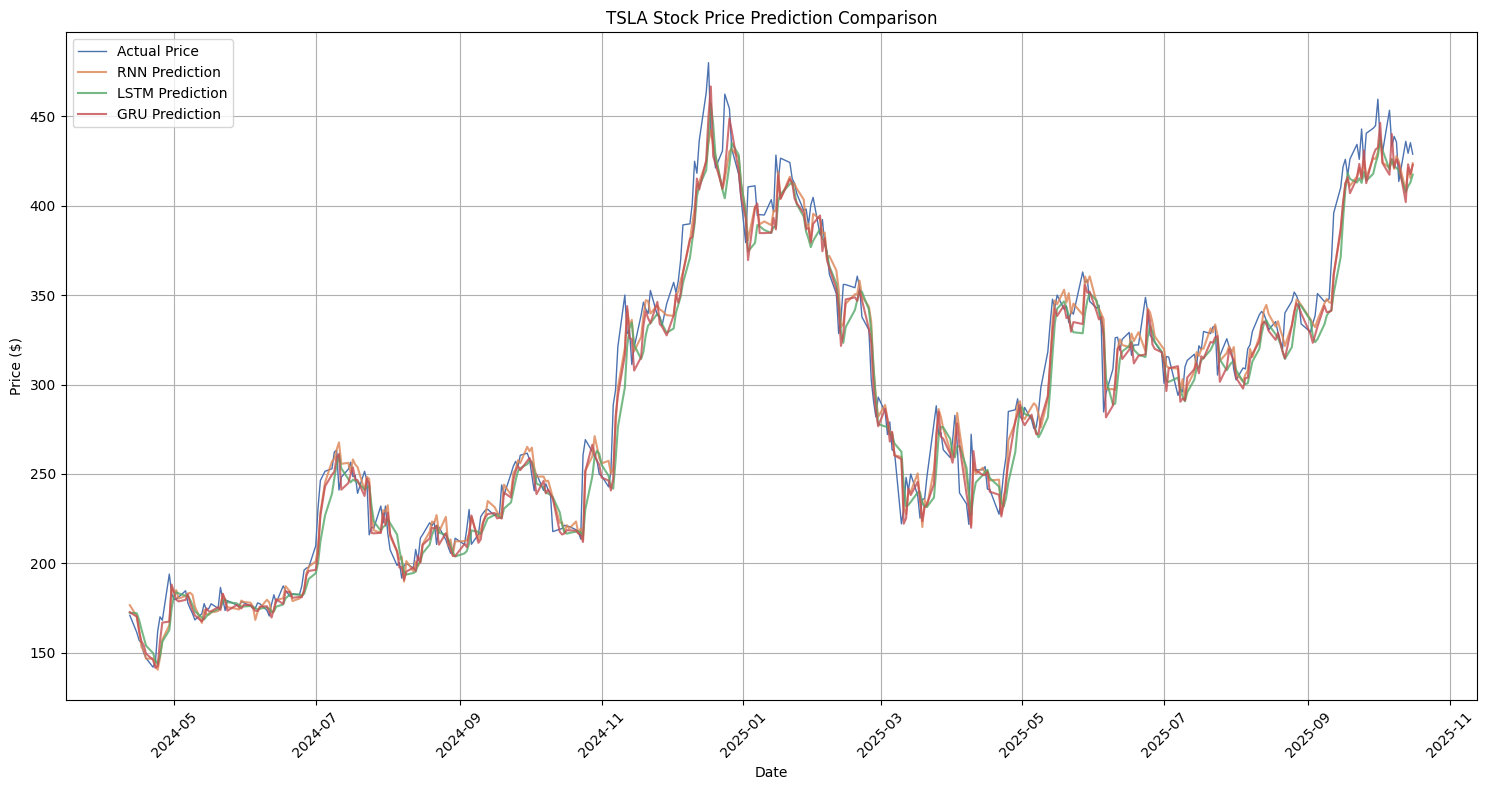

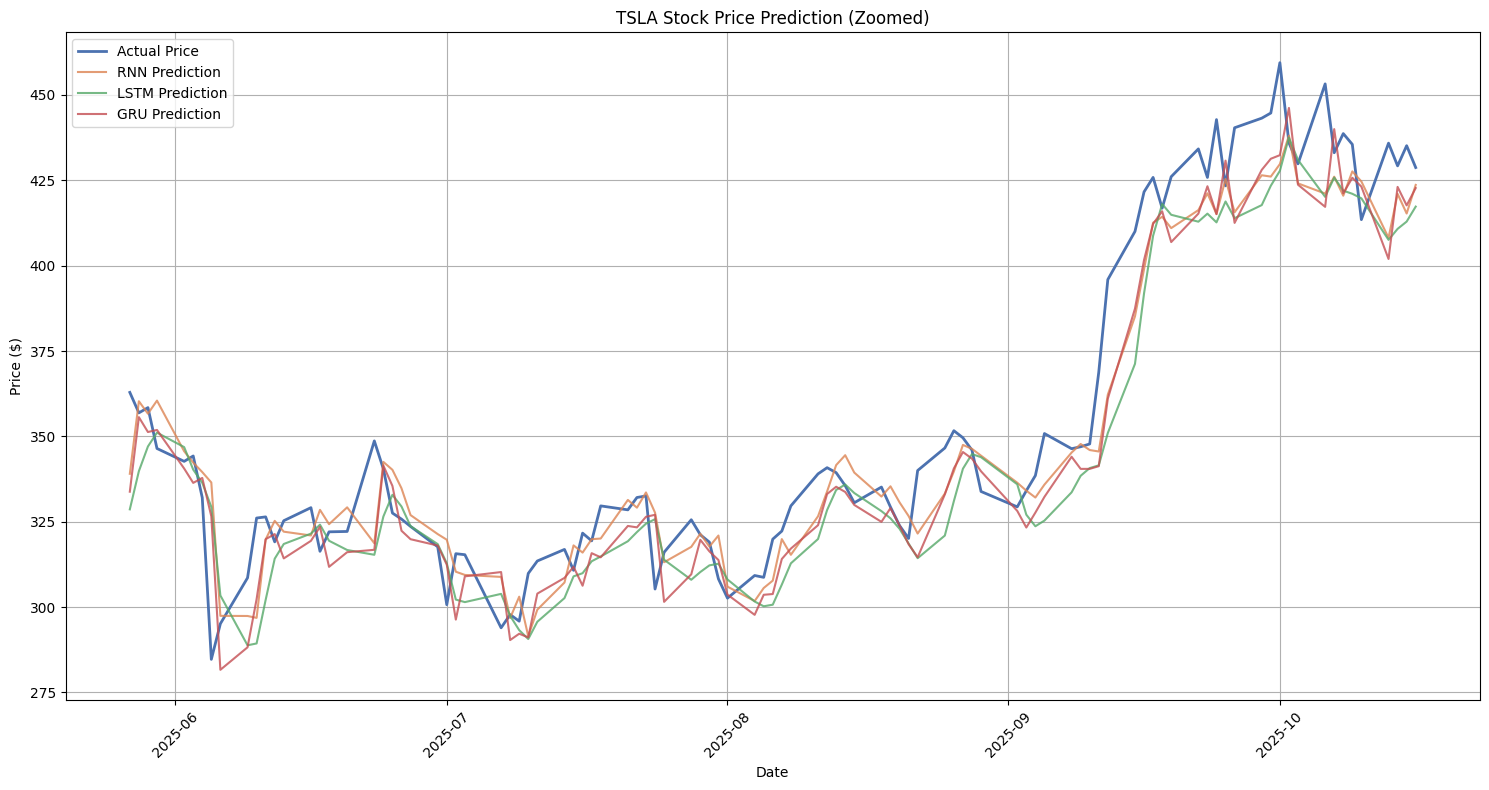

In [15]:
# Create date index for test data
test_dates = data.index[-len(y_test_original):]

# Plot predictions vs actual values
plt.figure(figsize=(15, 8))
plt.plot(test_dates, y_test_original, label='Actual Price', linewidth=1)
plt.plot(test_dates, rnn_predictions, label='RNN Prediction', alpha=0.8)
plt.plot(test_dates, lstm_predictions, label='LSTM Prediction', alpha=0.8)
plt.plot(test_dates, gru_predictions, label='GRU Prediction', alpha=0.8)

plt.title(f'{stock_symbol} Stock Price Prediction Comparison')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Zoom in on a specific period to see details better
zoom_start = -100  # Last 100 days

plt.figure(figsize=(15, 8))
plt.plot(test_dates[zoom_start:], y_test_original[zoom_start:], label='Actual Price', linewidth=2)
plt.plot(test_dates[zoom_start:], rnn_predictions[zoom_start:], label='RNN Prediction', alpha=0.8)
plt.plot(test_dates[zoom_start:], lstm_predictions[zoom_start:], label='LSTM Prediction', alpha=0.8)
plt.plot(test_dates[zoom_start:], gru_predictions[zoom_start:], label='GRU Prediction', alpha=0.8)

plt.title(f'{stock_symbol} Stock Price Prediction (Zoomed)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TODO 7: Analyze which model tracks the actual price most closely

# 6. Making Future Predictions

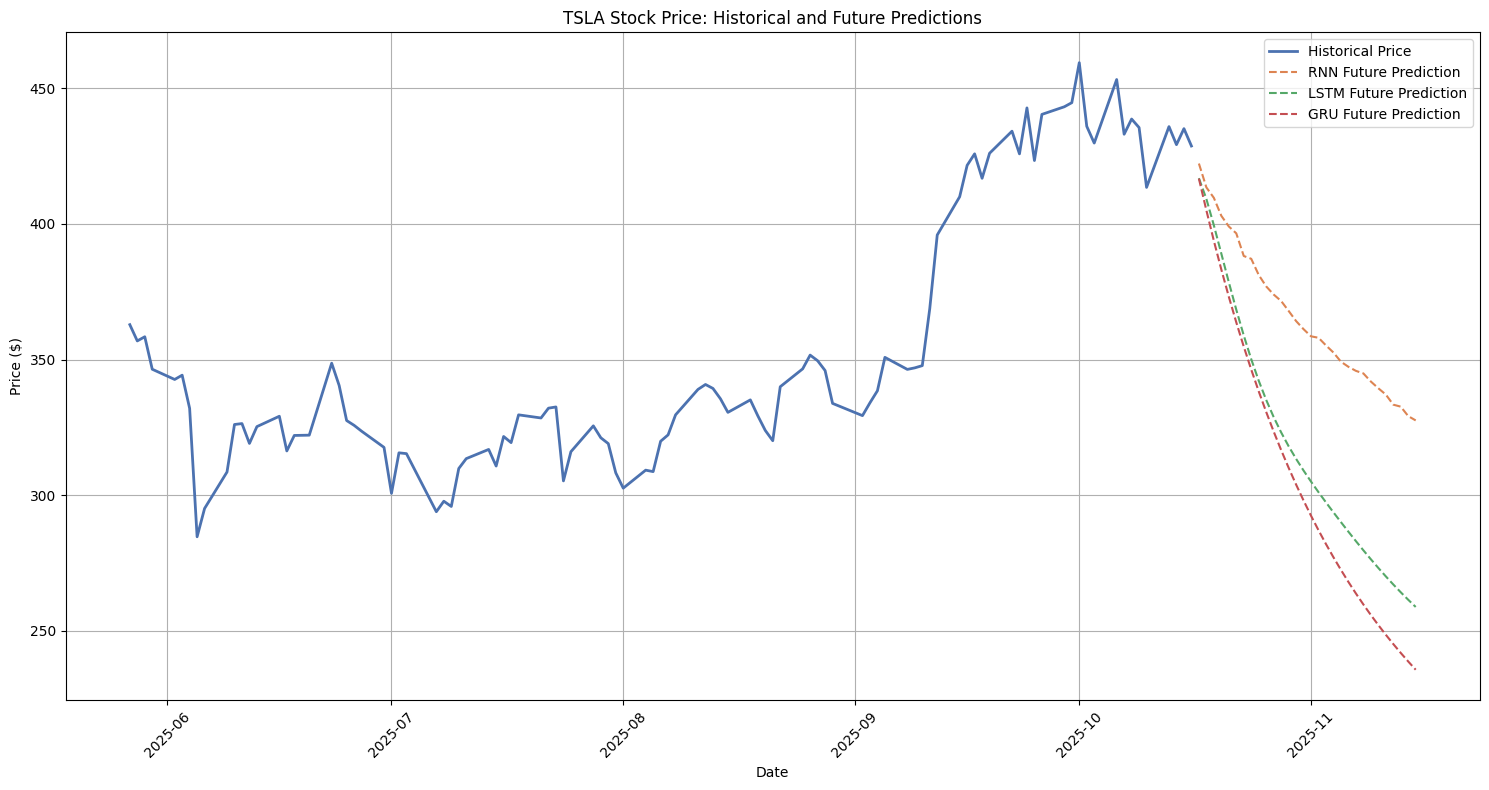

In [16]:
# Function to predict future prices
def predict_future_prices(model, last_sequence, days_to_predict=30):
    """
    Predict future stock prices using a trained model
    """
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(days_to_predict):
        # Predict the next value
        next_pred = model.predict(current_sequence.reshape(1, sequence_length, 1), verbose=0)
        future_predictions.append(next_pred[0, 0])
        
        # Update the sequence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred[0, 0]
    
    return np.array(future_predictions)

# Get the last sequence from our data
last_sequence = scaled_data[-sequence_length:]

# Predict future prices with each model
future_days = 30
rnn_future = predict_future_prices(rnn_model, last_sequence, future_days)
lstm_future = predict_future_prices(lstm_model, last_sequence, future_days)
gru_future = predict_future_prices(gru_model, last_sequence, future_days)

# Inverse transform to original scale
rnn_future = scaler.inverse_transform(rnn_future.reshape(-1, 1))
lstm_future = scaler.inverse_transform(lstm_future.reshape(-1, 1))
gru_future = scaler.inverse_transform(gru_future.reshape(-1, 1))

# Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')

# Plot historical data with future predictions
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(data.index[-100:], data['Close'].values[-100:], label='Historical Price', linewidth=2)

# Plot future predictions
plt.plot(future_dates, rnn_future, label='RNN Future Prediction', linestyle='--')
plt.plot(future_dates, lstm_future, label='LSTM Future Prediction', linestyle='--')
plt.plot(future_dates, gru_future, label='GRU Future Prediction', linestyle='--')

plt.title(f'{stock_symbol} Stock Price: Historical and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# TODO 8: Compare the future predictions from different models

FURTHER IMPROVEMENTS:
- Add more features (news sentiment, economic indicators)
- Use ensemble methods to combine multiple models
- Implement attention mechanisms
- Use more sophisticated risk management techniques